In [1]:
import PyPDF2
import pandas as pd
import re
import numpy as np
import os
import fitz
from PIL import Image
import io
from functools import partial
import scipy
import skimage

In [6]:
base_dir = '/home/student.unimelb.edu.au/shorte1/Documents/ACF_consulting'
table = pd.read_csv(base_dir + '/EPBC_notices.csv', dtype=str)
table['Threatened Species'] = 'None mentioned'
species = pd.read_csv('threatened_species_202010.csv')

In [3]:
# Check for scientific names 
# Loop through pdf files. Convert pdf to text. Search for scientific names.
folders = os.listdir("./files")

coordinates_mentioned = []

# Loop through folders
for folder in folders[0:20]:
    print(folder)
    try:
        fn = folder.split('_')[0] + '_' + folder.split('_')[1] + '_combined.pdf'
        pdf_file_obj = open(base_dir + '/files/' + folder + '/' + fn, 'rb')
        pdf_reader = PyPDF2.PdfFileReader(pdf_file_obj)
    except:
        fn = folder + '_combined.pdf'
        pdf_file_obj = open(base_dir + '/files/' + folder + '/' + fn, 'rb')
        pdf_reader = PyPDF2.PdfFileReader(pdf_file_obj)
    pages = [
        pdf_reader.getPage(i).extractText().replace('\n', '') 
        for i in range(pdf_reader.numPages)
    ]
    text = ''.join(pages)
    
    text_lower = text.lower()
    sci_name = species['Scientific Name'].apply(lambda x: x.lower()).values
    comm_name = species['Common Name'].loc[
        np.logical_and(
            species['Common Name'] != 'a shrub', species['Common Name'] != '-'
        )
    ].apply(lambda x: x.lower()).values

    [sci_name_exist, comm_name_exist] = [
        [
            species['Common Name'].values[i] + ', ' 
            + species['Scientific Name'].values[i] + ' (' 
            +  species['Threatened status'].values[i] + ')' 
            for i in range(len(name)) if name[i] in text.lower()
        ]
        for name in [sci_name, comm_name]
    ]
    
    if 'coordinates' in text.lower() or 'latitude' in text.lower() or 'longitude' in text.lower():
        coordinates_mentioned.append(folder)

    species_mentioned = sorted(
        list(set(sci_name_exist).union(set(comm_name_exist)))
    )
    species_mentioned = ', '.join(species_mentioned)
    
#     Extract text coordinates
#     text = re.sub('([-]?[0-9]{2}:[0-9]{2}:)([0-9]{1}).([0-9]{1})([0-9]{2})', '\g<1>\g<2>\g<3>.\g<4>', text)
#     text = re.sub('([-]?[0-9]{2}:[0-9]{2}:[0-9]{2}.[0-9]{2})([N,S]{1})', '\g<1> \g<2>', text)
#     points_lat = re.findall('[-]?[0-9]{2}:[0-9]{2}:[0-9]{2}.[0-9]{2} [N,S]{1}', text)
#     points_lon = re.findall('[-]?[0-9]{2,3}:[0-9]{2}:[0-9]{2}.[0-9]{2} [E,W]{1}', text)

    id_nums = folder.split('_')
    date = id_nums[1][:2] + '/' + id_nums[1][2:4] + '/' + id_nums[1][4:]
    ref_num = id_nums[0][:4] + '/' + id_nums[0][4:]
    table['Threatened Species'].loc[np.logical_and(
        table['Date of notice'] == date, table['Reference Number'] == ref_num
    )] = species_mentioned

20188347_01042019_2
20126615_22032016
20167773_10102016_2
20115797_25092020
20198536_21042020


KeyboardInterrupt: 

In [19]:
coords = np.array([-21.806901499355, 114.11264512388,
                    -21.807382598387, 114.11329054168,
                    -21.807783421088, 114.11410185229,
                    -21.808223839484, 114.11596229661,
                    -21.80846496118,  114.11698086229,
                    -21.808509356492, 114.11716844184,
                    -21.808684513419, 114.11712089594,
                    -21.808728908462, 114.11730846757,
                    -21.808553742054, 114.11735601109,
                    -21.80862263122,  114.11764700335,
                    -21.808638477216, 114.11788764276,
                    -21.808586248801, 114.11904966401,
                    -21.810952576821, 114.11886534991,
                    -21.813318915265, 114.11868104293,
                    -21.812597272916, 114.11562929686,
                    -21.814794582572, 114.11437573446,
                    -21.813819920427, 114.11241850938,
                    -21.813739958777, 114.11225792383,
                    -21.813640427101, 114.11205807032,
                    -21.813596934147, 114.11197073795,
                    -21.812933322895, 114.11063734726,
                    -21.810016434003, 114.11230000505,
                    -21.808164732732, 114.11213560639,
                    -21.806471692868, 114.11206852026,
                    -21.806868393194, 114.11260071016,
                    -21.806901499355, 114.11264512388])

In [20]:
coords = coords.reshape(int(len(coords)/2),2)
coords_new = np.zeros_like(coords)
coords_new[:,1] = coords[:,0]
coords_new[:,0] = coords[:,1]

In [3]:
pdf_file_obj = open('example_referral.pdf', 'rb')
pdf_reader = PyPDF2.PdfFileReader(pdf_file_obj)
pages = [pdf_reader.getPage(i).extractText().replace('\n', '') for i in range(pdf_reader.numPages)]



In [10]:
dir(pdf_reader)
pdf_reader.getObject()

<bound method PdfFileReader.getObject of <PyPDF2.pdf.PdfFileReader object at 0x7f47c74d2cf8>>

In [6]:
text = ''.join(pages)

In [3]:
import fitz

In [8]:
text = re.sub('([-]?[0-9]{2}:[0-9]{2}:)([0-9]{1}).([0-9]{1})([0-9]{2})', '\g<1>\g<2>\g<3>.\g<4>', text)
text = re.sub('([-]?[0-9]{2}:[0-9]{2}:[0-9]{2}.[0-9]{2})([N,S]{1})', '\g<1> \g<2>', text)

In [9]:
text

"Referral of proposed action  Proposed action title: Yangibana Rare Earths Project  1 Summary of proposed action  1.1 Short description Hastings Technology Metals Limited (Hastings) proposes to develop the Yangibana Rare Earths Project (the Proposal), located approximately 270 km east-northeast of Carnarvon, in the Upper Gascoyne region of Western Australia (WA).  The Proposal will involve mining ferrocarbonatite-magnetite-rare earth bearing dykes.  Proposal activities include construction, mining, processing, decommissioning and rehabilitation of a rare earth mine, and associated infrastructure.  The Proposal is expected to have a mine life of approximately seven years. 1.2 Latitude and longitude Polygon enclosing entire referral area. Points are listed in a clockwise order.  Latitude Longitude Point degrees minutes seconds degrees minutes seconds 1 -23:54:44.60 S  116:05:52.08 E 2 -23:54:09.76 S  116:06:12.24 E 3 -23:52:05.05 S  116:07:43.68 E 4 -23:50:13.59 S  116:10:00.12 E 5 -23:4

In [6]:
points_lat = re.findall('[-]?[0-9]{2}:[0-9]{2}:[0-9]{2}.[0-9]{2} [N,S]{1}', text)
points_lon = re.findall('[-]?[0-9]{2,3}:[0-9]{2}:[0-9]{2}.[0-9]{2} [E,W]{1}', text)

In [7]:
def convert_to_decimal(old):
    direction = {'N':1, 'S':-1, 'E': 1, 'W':-1}
    new = old.replace(':',' ')
    new = new.split()
    new_dir = new.pop()
    return (abs(float(new[0]))+float(new[1])/60.0+float(new[2])/3600.0) * direction[new_dir]

In [8]:
points_lat = [convert_to_decimal(i) for i in points_lat]
points_lon = [convert_to_decimal(i) for i in points_lon]

In [9]:
len(points_lat)
# len(points_lon)

43

In [10]:
kml_coords = ['{:010.6f},{:09.6f},1.'.format(points_lon[i], points_lat[i]) for i in range(len(points_lat))]

In [11]:
# missing first two rows on next page? decimal point in wrong place

In [12]:
# ' '.join(kml_coords)
for i in range(len(kml_coords)):
    print(kml_coords[i])

116.097800,-23.912389,1.
116.103400,-23.902711,1.
116.128800,-23.868069,1.
116.166700,-23.837108,1.
116.184700,-23.832039,1.
116.201400,-23.832039,1.
116.242900,-23.857950,1.
116.266700,-23.876028,1.
116.284700,-23.882028,1.
116.301400,-23.882028,1.
116.316700,-23.923008,1.
116.323200,-23.941039,1.
116.323100,-23.952800,1.
116.305900,-23.966669,1.
116.291700,-23.966669,1.
116.242300,-24.002581,1.
116.281800,-24.085300,1.
116.283700,-24.092450,1.
116.283500,-24.095708,1.
116.283100,-24.097158,1.
116.282400,-24.098489,1.
116.281400,-24.099619,1.
116.279900,-24.100581,1.
116.276950,-24.101900,1.
116.276300,-24.100689,1.
116.270900,-24.073489,1.
116.258350,-24.065739,1.
116.228400,-24.048269,1.
116.226900,-24.047128,1.
116.225850,-24.046219,1.
116.220700,-24.039050,1.
116.225800,-23.993439,1.
116.235100,-23.972639,1.
116.265600,-23.940978,1.
116.283300,-23.900000,1.
116.255700,-23.883328,1.
116.202842,-23.869419,1.
116.167000,-23.848278,1.
116.128800,-23.882069,1.
116.127200,-23.884089,1.


In [85]:
kml_coords

['-23.912389, 016.097800, 1',
 '-23.902711, 016.103400, 1',
 '-23.868069, 016.128800, 1']

In [80]:
'{:09.6f}, {:010.6f}'.format(points_lat[0], points_lon[0])

'-23.912389, 016.097800'

In [44]:
direction = {'N':1, 'S':-1, 'E': 1, 'W':-1}
test = points_lat[0]

In [45]:
new = test.replace(':',' ')
new = new.split()
new_dir = new.pop()
new

['-23', '54', '44.60']

In [10]:
species = pd.read_csv('threatened_species_202010.csv')

text_lower = text.lower()
sci_name = species['Scientific Name'].apply(lambda x: x.lower()).values
comm_name = species['Common Name'].loc[
    np.logical_and(
        species['Common Name'] != 'a shrub', species['Common Name'] != '-'
    )
].apply(lambda x: x.lower()).values

[sci_name_exist, comm_name_exist] = [
    [
        species['Common Name'].values[i] + ', ' 
        + species['Scientific Name'].values[i] + ' (' 
        +  species['Threatened status'].values[i] + ')' 
        for i in range(len(name)) if name[i] in text.lower()
    ]
    for name in [sci_name, comm_name]
]

species_mentioned = sorted(list(set(sci_name_exist).union(set(comm_name_exist))))
', '.join(species_mentioned)

In [67]:
list(species_mentioned)

['Northern Quoll, Digul [Gogo-Yimidir], Wijingadda [Dambimangari], Wiminji [Martu], Dasyurus hallucatus (Endangered)',
 'Mt Augustus Foxglove, Pityrodia augustensis (Vulnerable)',
 'Night Parrot, Pezoporus occidentalis (Endangered)',
 'Grey Falcon, Falco hypoleucos (Vulnerable)',
 'Rufous Hare-wallaby (Bernier Island), Lagorchestes hirsutus bernieri (Vulnerable)',
 'Ghost Bat, Macroderma gigas (Vulnerable)',
 'Curlew Sandpiper, Calidris ferruginea (Critically Endangered)',
 'Yinnietharra Rock-Dragon, Ctenophorus yinnietharra (Vulnerable)',
 'Mountain Procris, Elatostema montanum (Critically Endangered)',
 "Abbott's Booby, Papasula abbotti (Endangered)",
 'Slaty Red Gum, Eucalyptus glaucina (Vulnerable)',
 'Pilbara Leaf-nosed Bat, Rhinonicteris aurantia (Pilbara form) (Vulnerable)']

['Ghost Bat, Macroderma gigas (Vulnerable)',
 'Curlew Sandpiper, Calidris ferruginea (Critically Endangered)',
 'Grey Falcon, Falco hypoleucos (Vulnerable)',
 'Hal, Haloragodendron lucasii (Endangered)',
 'Night Parrot, Pezoporus occidentalis (Endangered)',
 'Ti, Cordyline obtecta (Vulnerable)',
 'Pilbara Leaf-nosed Bat, Rhinonicteris aurantia (Pilbara form) (Vulnerable)']

In [21]:
[i for i in species['Common Name'].values if 'corben' in i.lower()]

["Corben's Long-eared Bat, South-eastern Long-eared Bat"]

In [162]:
import minecart

pdffile = open('example_referral.pdf', 'rb')
doc = minecart.Document(pdffile)

page = doc.get_page(0) # getting a single page

#iterating through all pages
for page in doc.iter_pages():
    im = page.images[0].as_pil()  # requires pillow
    display(im)

ModuleNotFoundError: No module named 'minecart'

In [88]:
species

Scientific Name  \
0                                      Neophoca cinerea   
1                                      Mirounga leonina   
2                                 Balaenoptera borealis   
3                                 Balaenoptera musculus   
4                                 Balaenoptera physalus   
5                                Megaptera novaeangliae   
6                                   Eubalaena australis   
7                                       Xeromys myoides   
8                                  Zyzomys pedunculatus   
9                                 Pseudomys shortridgei   
10                                     Pseudomys fumeus   
11                                    Pseudomys gouldii   
12                            Pseudomys novaehollandiae   
13                                     Pseudomys oralis   
14                               Pseudomys pilligaensis   
15                                     Notomys macrotis   
16                                       Notomys mordax   
17                                  Pseudomys australis   
18                                     Pseudomys fieldi   
19                                       Notomys amplus   
20                                       Notomys aquilo   
21                                       Notomys fuscus   
22                                Notomys longicaudatus   
23                                    Conilurus albipes   
24                               Conilurus penicillatus   
25                                  Leporillus apicalis   
26                                  Leporillus conditor   
27                                     Macroderma gigas   
28                                  Hipposideros semoni   
29                                  Chalinolobus dwyeri   
...                                                 ...   
1866            Hypotaenidia philippensis macquariensis   
1867              Leucochrysum albicans subsp. tricolor   
1868                                Bertmainius colonus   
1869                                 Bertmainius tingle   
1870                         Gastrolobium argyrotrichum   
1871                  Kunzea ericifolia subsp. subulata   
1872                                Diomedea epomophora   
1873                                   Diomedea exulans   
1874                                 Thalassarche cauta   
1875                    Osphranter robustus isabellinus   
1876                                  Hibbertia abyssus   
1877                            Pterodroma arminjoniana   
1878                                 Notamacropus greyi   
1879   Eremophila sp. Narrow leaves (J.D.Start D12-150)   
1880                               Styphelia longissima   
1881  Eremophila glabra subsp. Scaddan (C. Turley s....   
1882        Hibbertia sp. Toolbrunup (J.R.Wheeler 2504)   
1883       Melaleuca sp. Wanneroo (G.J. Keighery 16705)   
1884  Lasiopetalum sp. Mount Caroline (S.D. Hopper S...   
1885                             Stylidium asymmetricum   
1886  Eucalyptus sp. Cattai (Gregson s.n., 28 Aug 1954)   
1887     Bossiaea sp. Frankland (E.M.Sandiford EMS 896)   
1888                            Rhizanthella johnstonii   
1889  Galaxias truttaceus (Western Australian popula...   
1890              Zieria odorifera subsp. warrabahensis   
1891                                  Ammoniropa vigens   
1892                          Carinascincus palfreymani   
1893                    Thinornis cucullatus cucullatus   
1894                 Petrogale lateralis kimberleyensis   
1895                            Leucopatus anophthalmus   

                                            Common Name  \
0              Australian Sea-lion, Australian Sea Lion   
1                                Southern Elephant Seal   
2                                             Sei Whale   
3                                            Blue Whale   
4                                             Fin Whale   
5                          

Extract from images.

In [2]:
file = '/home/student.unimelb.edu.au/shorte1/Documents/ACF_consulting/example_referral.pdf'
pdf_file = fitz.open(file)

In [3]:
pdf_file

Document('/home/student.unimelb.edu.au/shorte1/Documents/ACF_consulting/example_referral.pdf')

In [5]:
for page_index in range(len(pdf_file)):
    # get the page itself
    page = pdf_file[page_index]
    image_list = page.getImageList()
    # printing number of images found in this page
    if image_list:
        print(f"[+] Found a total of {len(image_list)} images in page {page_index}")
    else:
        print("[!] No images found on page", page_index)
    for image_index, img in enumerate(page.getImageList(), start=1):
#         # get the XREF of the image
#         xref = img[0]
#         # extract the image bytes
#         base_image = pdf_file.extractImage(xref)
#         image_bytes = base_image["image"]
#         # get the image extension
#         image_ext = base_image["ext"]
#         # load it to PIL
#         image = Image.open(io.BytesIO(image_bytes))
#         # save it to local disk
#         image.save(open(f"image{page_index+1}_{image_index}.png", "wb"))
        zoom_x = 4.0  # horizontal zoom
        zomm_y = 4.0  # vertical zoom
        mat = fitz.Matrix(zoom_x, zomm_y)  # zoom factor 2 in each dimension
        pix = page.get_pixmap(matrix=mat)  # use 'mat' instead of the identity matrix
        pix.writePNG("page-%i.png" % page.number)  # store image as a PNG

[!] No images found on page 0
[!] No images found on page 1
[!] No images found on page 2
[!] No images found on page 3
[!] No images found on page 4
[!] No images found on page 5
[!] No images found on page 6
[!] No images found on page 7
[!] No images found on page 8
[!] No images found on page 9
[!] No images found on page 10
[!] No images found on page 11
[!] No images found on page 12
[!] No images found on page 13
[!] No images found on page 14
[!] No images found on page 15
[!] No images found on page 16
[!] No images found on page 17
[!] No images found on page 18
[!] No images found on page 19
[!] No images found on page 20
[!] No images found on page 21
[!] No images found on page 22
[!] No images found on page 23
[!] No images found on page 24
[!] No images found on page 25
[!] No images found on page 26
[!] No images found on page 27
[!] No images found on page 28
[!] No images found on page 29
[+] Found a total of 1 images in page 30
[+] Found a total of 1 images in page 3

In [7]:
from skimage.io import imread
from scipy import ndimage as ndi
from skimage import feature
from skimage.color import rgb2gray 
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
import matplotlib.pyplot as plt
from skimage import filters

from skimage import data, segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial

In [8]:
im = imread(base_dir + '/page-32.png')

# im = im[:,:,2]
# im_array = sobel_hsv(im)

In [38]:
im.shape[1]/2

1685.0

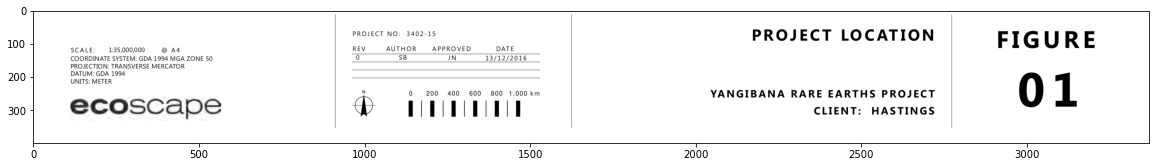

In [9]:
# display results
fig, ax1 = plt.subplots(
    figsize=(20, 20)
)
box_radius = 10
y_pos = 594
x_pos = 1926
ax1.imshow(im[-40*box_radius:-1, :, 2], cmap='gray', vmin=0, vmax=256)
# ax1.imshow(im[box_radius-box_radius:box_radius+box_radius, box_radius-box_radius:box_radius+box_radius, 2], cmap='gray', vmin=0, vmax=256)

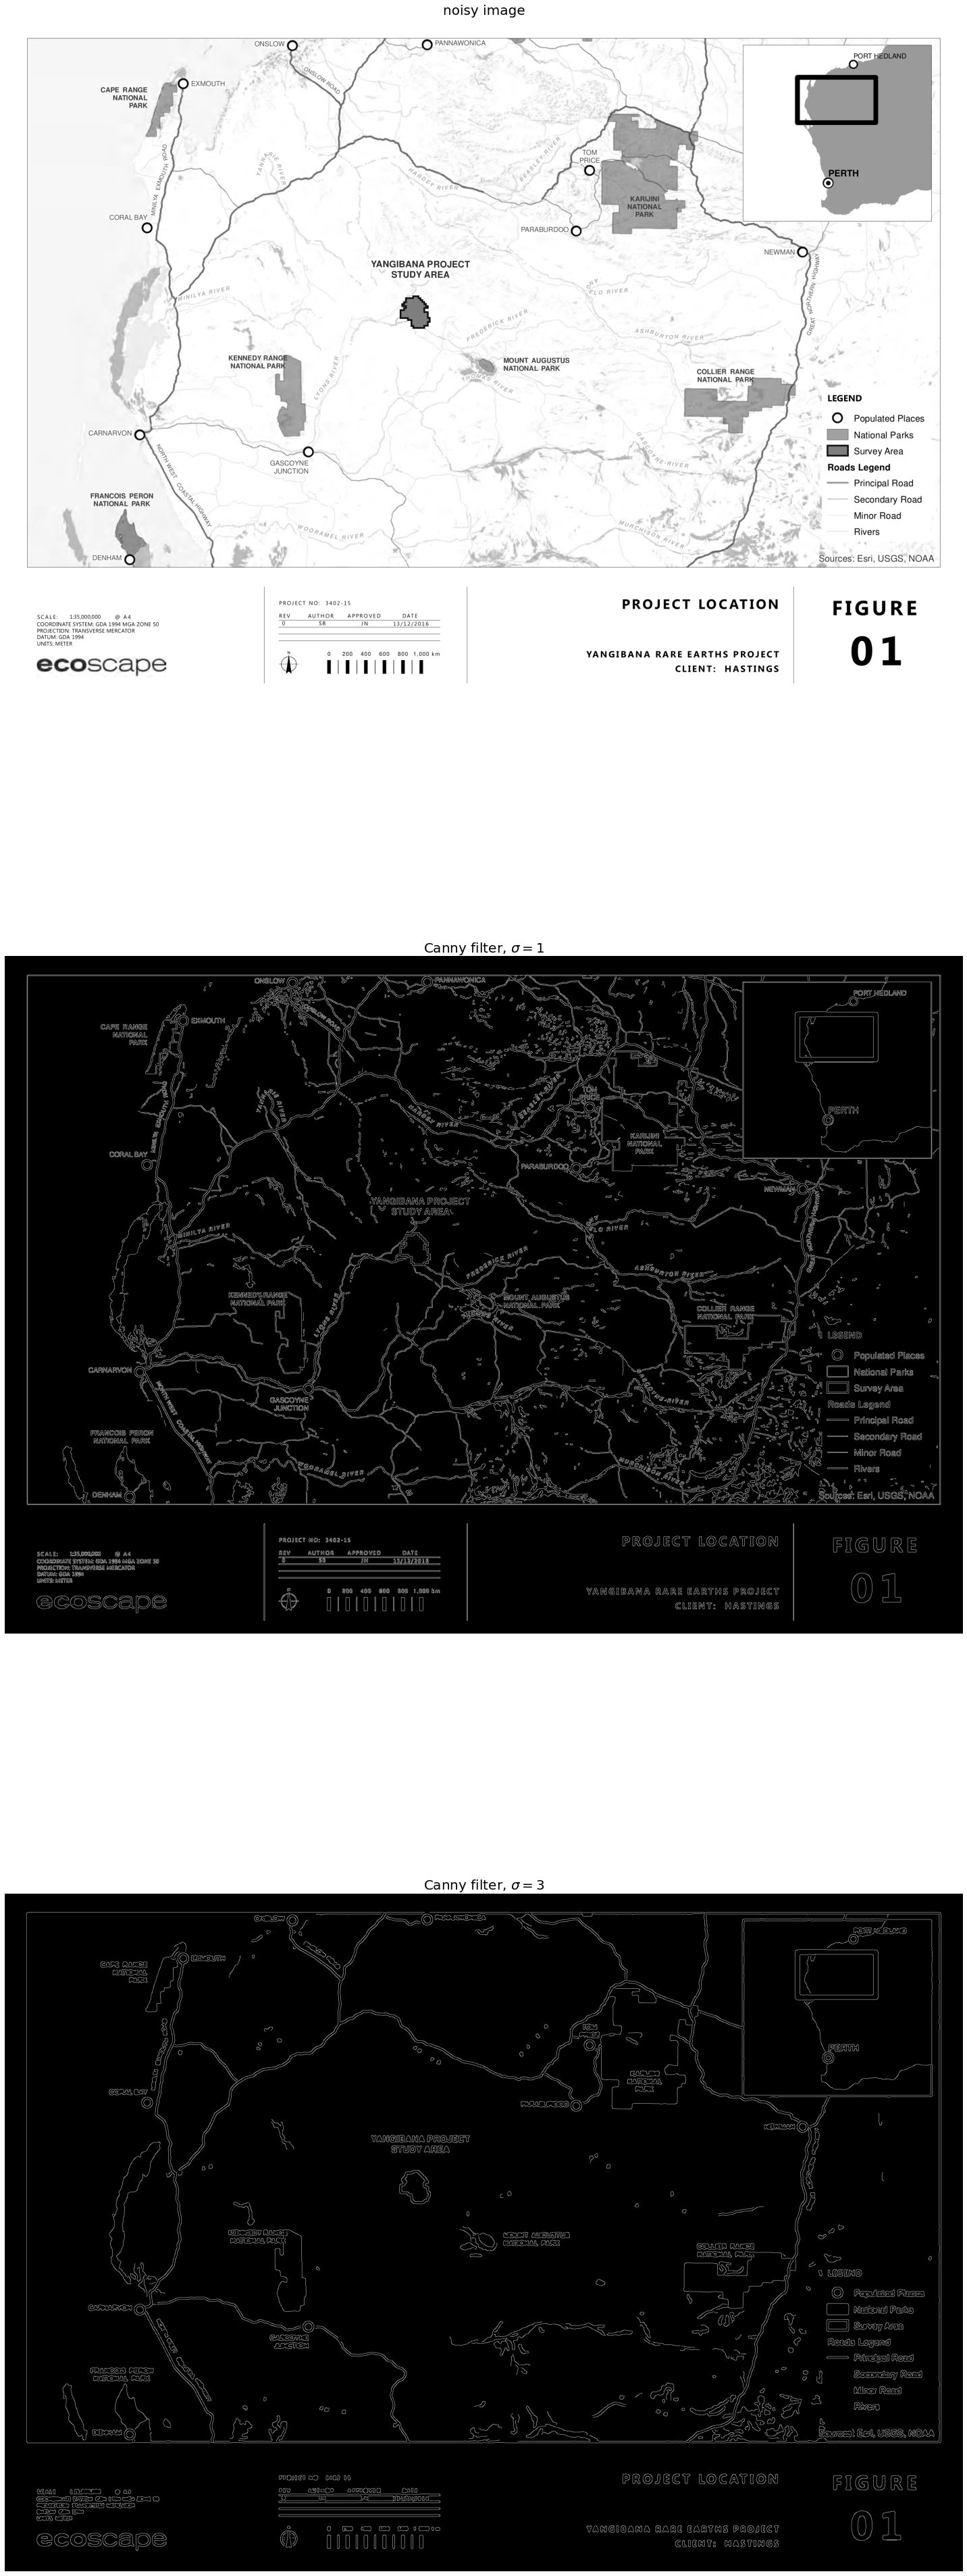

In [39]:
im2 = im[:,:,2]

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im2)
edges2 = feature.canny(im2, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 60),
                                    sharex=True, sharey=True)

ax1.imshow(im2, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [9]:
from skimage import data, segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial

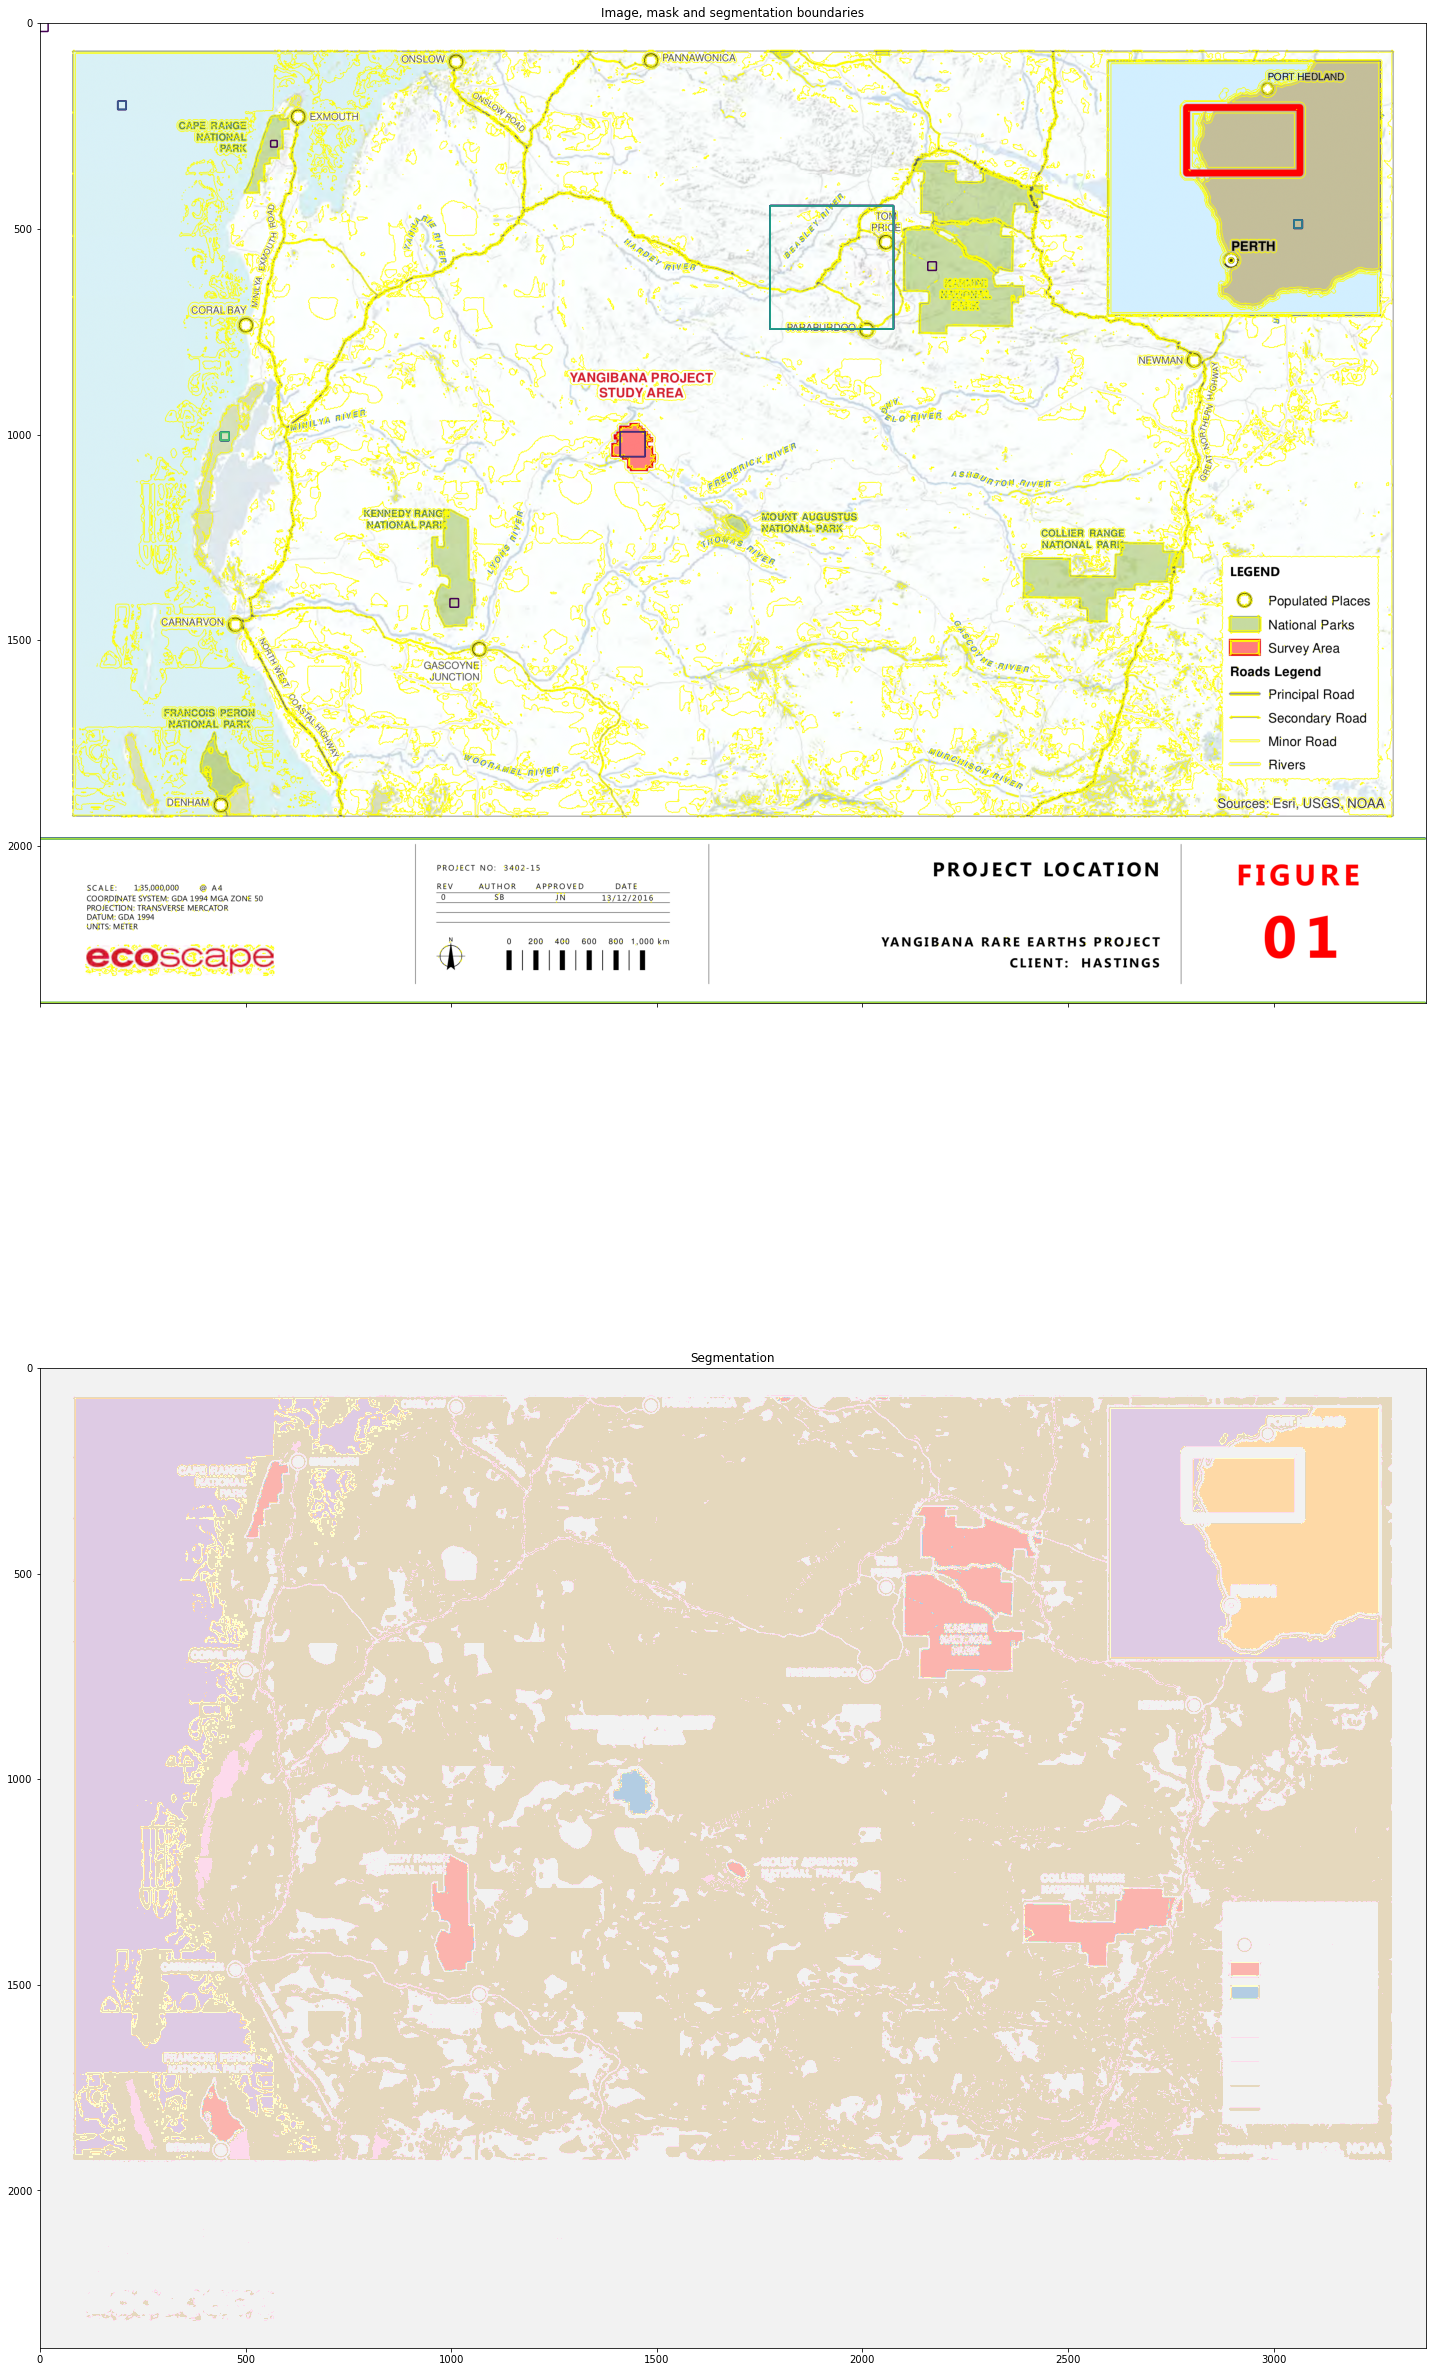

In [10]:
# Build an array of labels for training the segmentation.
# Here we use rectangles but visualization libraries such as plotly
# (and napari?) can be used to draw a mask on the image.
img = im
training_labels = np.zeros(img.shape[:2], dtype=np.uint8)

box_radius = 10

training_labels[box_radius-box_radius:box_radius+box_radius, box_radius-box_radius:box_radius+box_radius] = 1

training_labels[291-5:291+box_radius, 567-5:567+box_radius] = 1
training_labels[1410-box_radius:1410+box_radius,1008-box_radius:1008+box_radius] = 1
training_labels[591-box_radius:591+box_radius, 2170-box_radius:2170+box_radius] = 1
training_labels[1024-3*box_radius:1024+3*box_radius, 1442-3*box_radius:1442+3*box_radius] = 2
training_labels[200-box_radius:200+box_radius, 200-box_radius:200+box_radius] = 3
training_labels[489-box_radius:489+box_radius, 3060-box_radius:3060+box_radius] = 4
training_labels[594-box_radius*15:594+box_radius*15, 1926-box_radius*15:1926+box_radius*15] = 5
training_labels[1005-box_radius:1005+box_radius, 450-box_radius:450+box_radius] = 6
training_labels[-40*box_radius:-1, :] = 7

sigma_min = 1
sigma_max = 2
features_func = partial(feature.multiscale_basic_features,
                        intensity=True, edges=False, texture=True,
                        sigma_min=sigma_min, sigma_max=sigma_max,
                        multichannel=True)
features = features_func(img)
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1,
                             max_depth=10, max_samples=0.05)
clf = future.fit_segmenter(training_labels, features, clf)
result = future.predict_segmenter(features, clf)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20, 40))
ax[0].imshow(segmentation.mark_boundaries(img, result, mode='thick'))
ax[0].contour(training_labels)
ax[0].set_title('Image, mask and segmentation boundaries')
ax[1].imshow(result, cmap='Pastel1')
ax[1].set_title('Segmentation')
fig.tight_layout()

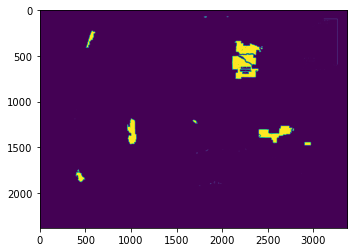

In [104]:
plt.imshow(result==1)

In [76]:
lons = copy.deepcopy(result)
lats = copy.deepcopy(result)

In [80]:
rows = [628, 735, 1901, 746]
cols = [228, 501, 439, 2010]
lats = [-21.932907, -23.142694, -25.927649, -23.200824]
lons = [114.124272, 113.770688, 113.536138, 117.671343]

In [83]:
from scipy.interpolate import interp1d

In [98]:
f_lat = interp1d(sorted(rows), sorted(np.abs(lats)), bounds_error=False, fill_value='extrapolate')
f_lon = interp1d(sorted(cols), sorted(np.abs(lons)), bounds_error=False, fill_value='extrapolate')

In [94]:
result.shape

(2383, 3370)

In [ ]:
result==1

In [99]:
lats_guess = f_lat(np.array(list(range(result.shape[0]))))*-1
lons_guess = f_lon(np.array(list(range(result.shape[1]))))

In [100]:
lons_guess

array([113.28269061, 113.28380222, 113.28491383, ..., 120.86112123,
       120.86347184, 120.86582245])

In [11]:
import cv2 as cv

In [12]:
from scipy import ndimage as ndi
label_objects, nb_labels = ndi.label(result==1)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 500
mask_sizes[0]=0
results1 = mask_sizes[label_objects]
test_image = Image.fromarray(results1)
test_image.save("test.png")

In [13]:
test_image = cv.imread('test.png')
gray = cv.cvtColor(test_image, cv.COLOR_BGR2GRAY)

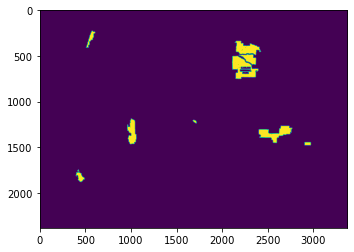

In [255]:
plt.imshow(gray)

In [151]:
test = np.zeros_like(result)
test[result==1]=1
test_image = Image.fromarray(test)
test_image.save("test.png")

In [52]:
contours, hierarchy = cv.findContours(gray, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_TC89_L1)

In [53]:
len(contours)

9

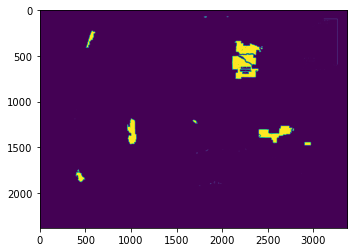

In [110]:
plt.imshow((result==1).astype(float))

In [280]:
poly_lats = [[lats_guess[contours[i][j][0][1]] for j in range(len(contours[i]))] for i in range(len(contours))]
poly_lons = [[lons_guess[contours[i][j][0][0]] for j in range(len(contours[i]))] for i in range(len(contours))]

In [281]:
poly_coords = 

[-25.549907008658007,
 -25.55698967099567,
 -25.571154995670994,
 -25.578237658008657,
 -25.58532032034632,
 -25.592402982683982,
 -25.599485645021645,
 -25.597124757575756,
 -25.594763870129867,
 -25.594763870129867,
 -25.597124757575756,
 -25.606568307359307,
 -25.618372744588743,
 -25.627816294372295,
 -25.63253806926407,
 -25.637259844155842,
 -25.637259844155842,
 -25.634898956709954,
 -25.625455406926406,
 -25.616011857142855,
 -25.618372744588743,
 -25.623094519480517,
 -25.634898956709954,
 -25.63962073160173,
 -25.64906428138528,
 -25.65850783116883,
 -25.67739493073593,
 -25.68683848051948,
 -25.689199367965365,
 -25.696282030303028,
 -25.717530017316015,
 -25.722251792207793,
 -25.722251792207793,
 -25.726973567099567,
 -25.73405622943723,
 -25.736417116883114,
 -25.724612679653678,
 -25.717530017316015,
 -25.71280824242424,
 -25.70336469264069,
 -25.70336469264069,
 -25.70572558008658,
 -25.710447354978353,
 -25.722251792207793,
 -25.745860666666665,
 -25.755304216450217,
 

In [286]:
for i in range(len(poly_lats[0])):
    print(str(poly_lons[0][i]) + ',' + str(poly_lats[0][i]) + ',1.')

113.75179060663508,-25.549907008658007,1.
113.75067899526067,-25.55698967099567,1.
113.74400932701423,-25.571154995670994,1.
113.740674492891,-25.578237658008657,1.
113.740674492891,-25.58532032034632,1.
113.73845127014218,-25.592402982683982,1.
113.73845127014218,-25.599485645021645,1.
113.740674492891,-25.597124757575756,1.
113.74289771563981,-25.594763870129867,1.
113.74623254976304,-25.594763870129867,1.
113.74956738388626,-25.597124757575756,1.
113.75179060663508,-25.606568307359307,1.
113.75179060663508,-25.618372744588743,1.
113.75067899526067,-25.627816294372295,1.
113.74956738388626,-25.63253806926407,1.
113.74734416113745,-25.637259844155842,1.
113.74400932701423,-25.637259844155842,1.
113.740674492891,-25.634898956709954,1.
113.73622804739337,-25.625455406926406,1.
113.73511643601896,-25.616011857142855,1.
113.73289321327015,-25.618372744588743,1.
113.73289321327015,-25.623094519480517,1.
113.72733515639811,-25.634898956709954,1.
113.7262235450237,-25.63962073160173,1.
113.7

In [17]:
from pyproj import Proj, transform

In [77]:
p = Proj(proj='tmerc', crs='GDA94', zone=50, ellps='GRS80', lon_0=117, lat_0=0, units='m' , k_0='0.9996', preserve_units=True, x_0=500, y_0=10000)

In [78]:
p(100, -10000000, inverse=True)

(-61.0964035390321, -89.89214708558553)

In [342]:
for i in range(len(poly_lats[0])):
    print(str(poly_lons[0][i]) + ',' + str(poly_lats[0][i]) + ',1.')

113.75179060663508,-25.549907008658007,1.
113.75067899526067,-25.55698967099567,1.
113.74400932701423,-25.571154995670994,1.
113.740674492891,-25.578237658008657,1.
113.740674492891,-25.58532032034632,1.
113.73845127014218,-25.592402982683982,1.
113.73845127014218,-25.599485645021645,1.
113.740674492891,-25.597124757575756,1.
113.74289771563981,-25.594763870129867,1.
113.74623254976304,-25.594763870129867,1.
113.74956738388626,-25.597124757575756,1.
113.75179060663508,-25.606568307359307,1.
113.75179060663508,-25.618372744588743,1.
113.75067899526067,-25.627816294372295,1.
113.74956738388626,-25.63253806926407,1.
113.74734416113745,-25.637259844155842,1.
113.74400932701423,-25.637259844155842,1.
113.740674492891,-25.634898956709954,1.
113.73622804739337,-25.625455406926406,1.
113.73511643601896,-25.616011857142855,1.
113.73289321327015,-25.618372744588743,1.
113.73289321327015,-25.623094519480517,1.
113.72733515639811,-25.634898956709954,1.
113.7262235450237,-25.63962073160173,1.
113.7

In [79]:
y = np.array(list(range(result.shape[0])), dtype=float)
x = np.array(list(range(result.shape[1])), dtype=float)

In [80]:
x = x*3076.92307692
y = y*3076.92307692

In [81]:
x = x - x[2009]
y = y - y[746]

In [82]:
x = x + 68e3
y = y + 2578e3

In [83]:
y[746]

2578000.0

In [84]:
XX, YY = np.meshgrid(x,y)

In [85]:
LON, LAT = p(XX, YY, inverse=True)

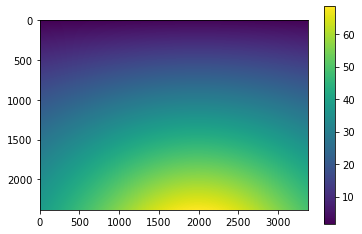

In [87]:
plt.imshow(LAT)
plt.colorbar()

In [51]:
print(LON[contours[0][0][0][0],contours[0][0][0][1]])
print(LAT[contours[0][0][0][0],contours[0][0][0][1]])

109.8607186162653
14.222124257641385
